# Boston House Price - Regression predictive modelling

## Load the dataset

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load dataset
url = "https://goo.gl/sXleFv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(url, delim_whitespace=True, names=names)

(506, 14)

## Analyze Data
### Descriptive Statistics

In [5]:
#shape
dataset.shape

(506, 14)

In [4]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [6]:
# head
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# descriptions
pd.set_option('precision', 1)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


The min, max and mean values vary a lot -- > Indicates need for rescaling the data

In [8]:
# correlation
pd.set_option('precision', 2)
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


## Data Visualizations
### Unimodal Data Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA67EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D89FA20>]], dtype=object)

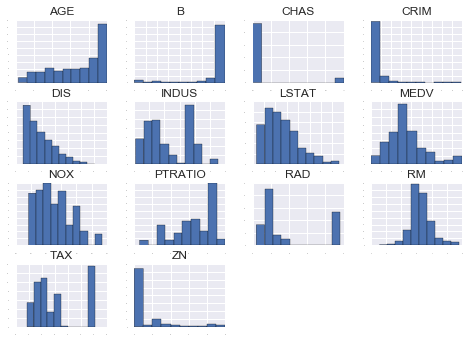

In [10]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

Exponential distribution is seen with CRIM, ZN, AGE and B

Bimdoal distribution with  RAD, TAX

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAC9198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F663080>]], dtype=object)

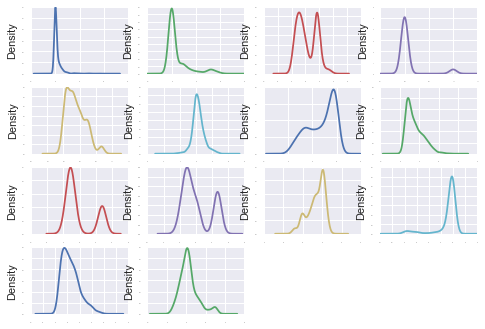

In [11]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)

CRIM          Axes(0.125,0.731522;0.168478x0.168478)
ZN         Axes(0.327174,0.731522;0.168478x0.168478)
INDUS      Axes(0.529348,0.731522;0.168478x0.168478)
CHAS       Axes(0.731522,0.731522;0.168478x0.168478)
NOX           Axes(0.125,0.529348;0.168478x0.168478)
RM         Axes(0.327174,0.529348;0.168478x0.168478)
AGE        Axes(0.529348,0.529348;0.168478x0.168478)
DIS        Axes(0.731522,0.529348;0.168478x0.168478)
RAD           Axes(0.125,0.327174;0.168478x0.168478)
TAX        Axes(0.327174,0.327174;0.168478x0.168478)
PTRATIO    Axes(0.529348,0.327174;0.168478x0.168478)
B          Axes(0.731522,0.327174;0.168478x0.168478)
LSTAT            Axes(0.125,0.125;0.168478x0.168478)
MEDV          Axes(0.327174,0.125;0.168478x0.168478)
dtype: object

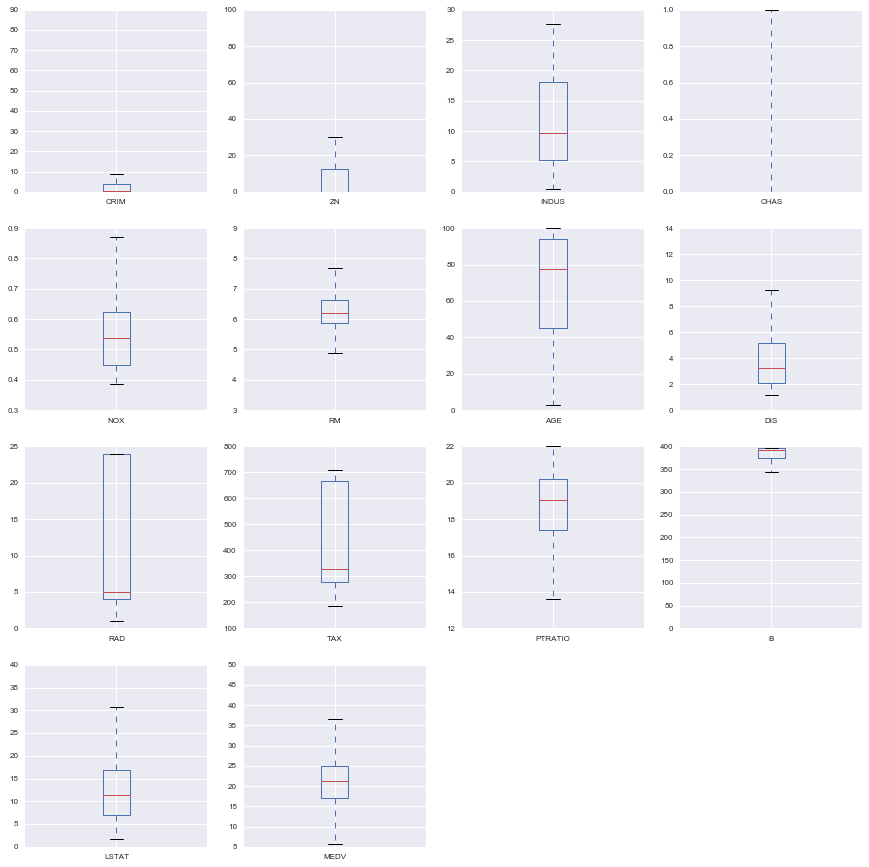

In [22]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, figsize=(15,15))

### Multimodal Data Visualizations